In [1]:
# IMPORTS MINE:
import sounddevice as sd
import time as stime
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
samplerate = 16000
DEFAULT_SAMPLE_RATE = 16000
sd.default.samplerate  = samplerate # defult samplerate for sounddevice library
sd.default.channels = 1

In [3]:
### my Functions:
def playsound(inputsound):
    if len(inputsound) == 1:
        sd.play(inputsound[0], DEFAULT_SAMPLE_RATE)
        stime.sleep(len(inputsound[0])/DEFAULT_SAMPLE_RATE)
        sd.stop()
    else:
        sd.play(inputsound, DEFAULT_SAMPLE_RATE)
        stime.sleep(len(inputsound)/DEFAULT_SAMPLE_RATE)
        sd.stop()


def Myspecplot(inputsound):
    if len(inputsound)==1:
        plot = plt.figure(figsize=(4, 4))
        powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(inputsound[0], Fs=DEFAULT_SAMPLE_RATE)
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        return plot   
    else:
        plot = plt.figure(figsize=(4, 4))
        powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(inputsound, Fs=DEFAULT_SAMPLE_RATE)
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        return plot

    
# record sound and returen one arrry object
def recorder(duration=5):
    #duration = 5  # seconds
    # defult sample rate is 1600
    rec_audio = sd.rec(int(duration * sd.default.samplerate))
    sd.wait()
    audio = []
    for i in rec_audio:
        audio.append(i[0])
    audio = np.array(audio) 
    return audio

# record sound and returen one arrry object
def recorder_simple(duration=5):
    
    #duration = 5  # seconds
    # defult sample rate is 1600
    recorded_audio = sd.rec(int(duration * sd.default.samplerate))
    sd.wait()
    return recorded_audio

def ploter(var):
    plt.figure()
    plt.title("Signal Wave...")
    plt.plot(var)
    plt.show()

In [14]:
audio = recorder_simple(2)

In [15]:
playsound(audio)
print(audio[0:100])

[[-8.0500234e-07]
 [-3.7759876e-06]
 [ 1.8276358e-05]
 [-4.9172166e-05]
 [ 8.9672656e-05]
 [-1.1821756e-04]
 [ 9.1541013e-05]
 [ 8.9365174e-05]
 [-3.8486812e-03]
 [-6.4200656e-03]
 [-6.5514739e-03]
 [-6.4965971e-03]
 [-3.9191106e-03]
 [-2.3791294e-03]
 [-1.8234409e-03]
 [ 1.9364280e-04]
 [-4.4675014e-04]
 [-1.6751596e-03]
 [-1.9807504e-03]
 [-2.8142333e-03]
 [-3.2647916e-03]
 [-3.9480757e-03]
 [-5.2686976e-03]
 [-3.8403650e-03]
 [-3.4165855e-03]
 [-4.3620984e-03]
 [-2.4817321e-03]
 [-3.1960546e-03]
 [-4.6747401e-03]
 [-3.3444827e-03]
 [-9.7504683e-04]
 [ 3.6862071e-04]
 [ 1.2719956e-03]
 [ 1.6608280e-03]
 [ 1.8341125e-03]
 [ 1.4055277e-03]
 [ 4.7444276e-04]
 [-2.6811493e-04]
 [-2.8765210e-04]
 [ 1.3836306e-04]
 [ 3.8060680e-04]
 [-1.8955552e-04]
 [ 4.4118788e-05]
 [-1.5672611e-04]
 [-9.1305218e-04]
 [-1.3082771e-03]
 [ 1.2705754e-04]
 [ 1.2674034e-03]
 [-7.9741678e-04]
 [-1.0144530e-03]
 [-1.7968190e-03]
 [-3.0726520e-03]
 [-2.4064858e-03]
 [-8.7326264e-04]
 [ 2.4186361e-03]
 [ 3.30589

In [18]:
print(len(audio))

32000


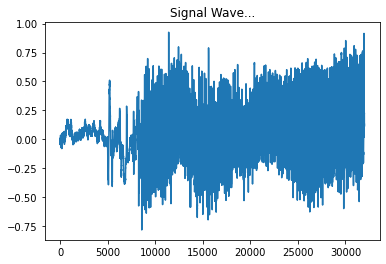

In [19]:
audio1 = audio * 7
ploter(audio1)
playsound(audio1)

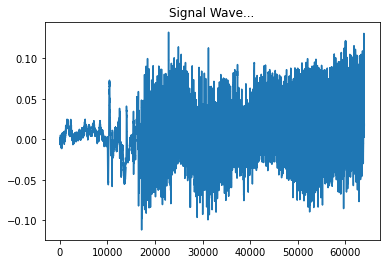

In [27]:
audio2 = []
for var in audio:
    audio2.append(var)
    audio2.append(var)
ploter(audio2)
playsound(audio2)
playsound(audio)


In [26]:
len(audio2)

64000

In [58]:
import os
import gin
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

#@title Load a model
#@markdown Run for ever new audio input
model = 'Violin' #@param ['Violin', 'Flute', 'Flute2', 'Trumpet', 'Tenor_Saxophone', 'Upload your own (checkpoint folder as .zip)']
MODEL = model


def find_model_dir(dir_name):
  # Iterate through directories until model directory is foundfor root, dirs, filenames in os.walk(dir_name):
    for filename in filenames:
        if filename.endswith(".gin") and not filename.startswith("."):
            model_dir = root
            break
        return model_dir 

# if model in ('Violin', 'Flute', 'Flute2', 'Trumpet', 'Tenor_Saxophone'):
#     # Pretrained models.
#     PRETRAINED_DIR = '/content/pretrained'
#     # Copy over from gs:// for faster loading.
#     !rm -r $PRETRAINED_DIR &> /dev/null
#     !mkdir $PRETRAINED_DIR &> /dev/null
#     GCS_CKPT_DIR = 'gs://ddsp/models/timbre_transfer_colab/2020-11-06'
#     model_dir = os.path.join(GCS_CKPT_DIR, 'solo_%s_ckpt' % model.lower())
   
#     !gsutil cp $model_dir/* $PRETRAINED_DIR &> /dev/null
#     model_dir = PRETRAINED_DIR
#     gin_file = os.path.join(model_dir, 'operative_config-0.gin')

# else:
#   # User models.
#     UPLOAD_DIR = '/content/uploaded'
#     !mkdir $UPLOAD_DIR
#     uploaded_files = files.upload()

#     for fnames in uploaded_files.keys():
#     	print("Unzipping... {}".format(fnames))
#     	!unzip -o "/content/$fnames" -d $UPLOAD_DIR &> /dev/null
#     model_dir = find_model_dir(UPLOAD_DIR)
#     gin_file = os.path.join(model_dir, 'operative_config-0.gin')


# Load the dataset statistics.
DATASET_STATS = None
dataset_stats_file = os.path.join(model_dir, 'dataset_statistics.pkl')
print(f'Loading dataset statistics from {dataset_stats_file}')
try:
	if tf.io.gfile.exists(dataset_stats_file):
		with tf.io.gfile.GFile(dataset_stats_file, 'rb') as f:
			DATASET_STATS = pickle.load(f)
except Exception as err:
	print('Loading dataset statistics from pickle failed: {}.'.format(err))


gin_file = 'content/pretrained/operative_config-0.gin'     
    
# Parse gin config,
with gin.unlock_config():
	gin.parse_config_file(gin_file, skip_unknown=True)
model_dir = 'content/pretrained'

# Assumes only one checkpoint in the folder, 'ckpt-[iter]`.
ckpt_files = [f for f in tf.io.gfile.listdir(model_dir) if 'ckpt' in f]
ckpt_name = ckpt_files[0].split('.')[0]
ckpt = os.path.join(model_dir, ckpt_name)

# Ensure dimensions and sampling rates are equal
time_steps_train = gin.query_parameter('DefaultPreprocessor.time_steps')
n_samples_train = gin.query_parameter('Additive.n_samples')
hop_size = int(n_samples_train / time_steps_train)

time_steps = int(audio.shape[1] / hop_size)
n_samples = time_steps * hop_size

print("===Trained model===")
print("Time Steps", time_steps_train)
print("Samples", n_samples_train)
print("Hop Size", hop_size)
print("\n===Resynthesis===")
print("Time Steps", time_steps)
print("Samples", n_samples)
print('')

gin_params = [
	'Additive.n_samples = {}'.format(n_samples),
	'FilteredNoise.n_samples = {}'.format(n_samples),
	'DefaultPreprocessor.time_steps = {}'.format(time_steps),
	'oscillator_bank.use_angular_cumsum = True',  # Avoids cumsum accumulation errors.
]

with gin.unlock_config():
    gin.parse_config(gin_params)


# Trim all input vectors to correct lengths 
for key in ['f0_hz', 'f0_confidence', 'loudness_db']:
    audio_features[key] = audio_features[key][:time_steps]
audio_features['audio'] = audio_features['audio'][:, :n_samples]


# Set up the model just to predict audio given new conditioning
model = ddsp.training.models.Autoencoder()
model.restore(ckpt)

# Build model by running a batch through it.
start_time = time.time()
_ = model(audio_features, training=False)
print('Restoring model took %.1f seconds' % (time.time() - start_time))

Loading dataset statistics from content/pretrained/dataset_statistics.pkl
Loading dataset statistics from pickle failed: No module named 'google.colab'.
===Trained model===
Time Steps 1000
Samples 64000
Hop Size 64

===Resynthesis===
Time Steps 0
Samples 0



NameError: name 'audio_features' is not defined

In [75]:
LD_RANGE = 120.0  # dB
import librosa

def pad_or_trim_to_expected_length(vector,
                                   expected_len,
                                   pad_value=0,
                                   len_tolerance=20,
                                   use_tf=False):
  """Make vector equal to the expected length.

  Feature extraction functions like `compute_loudness()` or `compute_f0` produce
  feature vectors that vary in length depending on factors such as `sample_rate`
  or `hop_size`. This function corrects vectors to the expected length, warning
  the user if the difference between the vector and expected length was
  unusually high to begin with.

  Args:
    vector: Numpy 1D ndarray. Shape [vector_length,]
    expected_len: Expected length of vector.
    pad_value: Value to pad at end of vector.
    len_tolerance: Tolerance of difference between original and desired vector
      length.
    use_tf: Make function differentiable by using tensorflow.

  Returns:
    vector: Vector with corrected length.

  Raises:
    ValueError: if `len(vector)` is different from `expected_len` beyond
    `len_tolerance` to begin with.
  """
  expected_len = int(expected_len)
  vector_len = int(vector.shape[-1])

  if abs(vector_len - expected_len) > len_tolerance:
    # Ensure vector was close to expected length to begin with
    raise ValueError('Vector length: {} differs from expected length: {} '
                     'beyond tolerance of : {}'.format(vector_len,
                                                       expected_len,
                                                       len_tolerance))
  # Pick tensorflow or numpy.
  lib = tf if use_tf else np

  is_1d = (len(vector.shape) == 1)
  vector = vector[lib.newaxis, :] if is_1d else vector

  # Pad missing samples
  if vector_len < expected_len:
    n_padding = expected_len - vector_len
    vector = lib.pad(
        vector, ((0, 0), (0, n_padding)),
        mode='constant',
        constant_values=pad_value)
  # Trim samples
  elif vector_len > expected_len:
    vector = vector[..., :expected_len]

  # Remove temporary batch dimension.
  vector = vector[0] if is_1d else vector
  return vector


def amplitude_to_db(amplitude, use_tf=False):
  """Converts amplitude to decibels."""
  lib = tf if use_tf else np
  log10 = (lambda x: tf.math.log(x) / tf.math.log(10.0)) if use_tf else np.log10
  amin = 1e-20  # Avoid log(0) instabilities.
  db = log10(lib.maximum(amin, amplitude))
  db *= 20.0
  return db


def stft_np(audio, frame_size=2048, overlap=0.75, pad_end=True):
  """Non-differentiable stft using librosa, one example at a time."""
  assert frame_size * overlap % 2.0 == 0.0
  hop_size = int(frame_size * (1.0 - overlap))
  is_2d = (len(audio.shape) == 2)

  if pad_end:
    n_samples_initial = int(audio.shape[-1])
    n_frames = int(np.ceil(n_samples_initial / hop_size))
    n_samples_final = (n_frames - 1) * hop_size + frame_size
    pad = n_samples_final - n_samples_initial
    padding = ((0, 0), (0, pad)) if is_2d else ((0, pad),)
    audio = np.pad(audio, padding, 'constant')

  def stft_fn(y):
    return librosa.stft(y=y,
                        n_fft=int(frame_size),
                        hop_length=hop_size,
                        center=False).T

  s = np.stack([stft_fn(a) for a in audio]) if is_2d else stft_fn(audio)
  return s



def compute_loudness(audio,
                     sample_rate=16000,
                     frame_rate=250,
                     n_fft=2048,
                     range_db=LD_RANGE,
                     ref_db=20.7,
                     use_tf=False):
  """Perceptual loudness in dB, relative to white noise, amplitude=1.

  Function is differentiable if use_tf=True.
  Args:
    audio: Numpy ndarray or tensor. Shape [batch_size, audio_length] or
      [batch_size,].
    sample_rate: Audio sample rate in Hz.
    frame_rate: Rate of loudness frames in Hz.
    n_fft: Fft window size.
    range_db: Sets the dynamic range of loudness in decibles. The minimum
      loudness (per a frequency bin) corresponds to -range_db.
    ref_db: Sets the reference maximum perceptual loudness as given by
      (A_weighting + 10 * log10(abs(stft(audio))**2.0). The default value
      corresponds to white noise with amplitude=1.0 and n_fft=2048. There is a
      slight dependence on fft_size due to different granularity of perceptual
      weighting.
    use_tf: Make function differentiable by using tensorflow.

  Returns:
    Loudness in decibels. Shape [batch_size, n_frames] or [n_frames,].
  """
  if sample_rate % frame_rate != 0:
    raise ValueError(
        'frame_rate: {} must evenly divide sample_rate: {}.'
        'For default frame_rate: 250Hz, suggested sample_rate: 16kHz or 48kHz'
        .format(frame_rate, sample_rate))

  # Pick tensorflow or numpy.
  lib = tf if use_tf else np

  # Make inputs tensors for tensorflow.
  audio = tf_float32(audio) if use_tf else audio

  # Temporarily a batch dimension for single examples.
  is_1d = (len(audio.shape) == 1)
  audio = audio[lib.newaxis, :] if is_1d else audio

  # Take STFT.
  hop_size = sample_rate // frame_rate
  overlap = 1 - hop_size / n_fft
  stft_fn = stft if use_tf else stft_np
  s = stft_fn(audio, frame_size=n_fft, overlap=overlap, pad_end=True)

  # Compute power.
  amplitude = lib.abs(s)
  power_db = amplitude_to_db(amplitude, use_tf=use_tf)

  # Perceptual weighting.
  frequencies = librosa.fft_frequencies(sr=sample_rate, n_fft=n_fft)
  a_weighting = librosa.A_weighting(frequencies)[lib.newaxis, lib.newaxis, :]
  loudness = power_db + a_weighting

  # Set dynamic range.
  loudness -= ref_db
  loudness = lib.maximum(loudness, -range_db)
  mean = tf.reduce_mean if use_tf else np.mean

  # Average over frequency bins.
  loudness = mean(loudness, axis=-1)

  # Remove temporary batch dimension.
  loudness = loudness[0] if is_1d else loudness

  # Compute expected length of loudness vector
  n_secs = audio.shape[-1] / float(
      sample_rate)  # `n_secs` can have milliseconds
  expected_len = int(n_secs * frame_rate)

  # Pad with `-range_db` noise floor or trim vector
  loudness = pad_or_trim_to_expected_length(
      loudness, expected_len, -range_db, use_tf=use_tf)
  return loudness



In [80]:
def squeeze(input_vector):
  """Ensure vector only has one axis of dimensionality."""
  if input_vector.ndim > 1:
    return np.squeeze(input_vector)
  else:
    return input_vector

In [85]:
import crepe
def compute_f0(audio, sample_rate, frame_rate, viterbi=True):
  """Fundamental frequency (f0) estimate using CREPE.

  This function is non-differentiable and takes input as a numpy array.
  Args:
    audio: Numpy ndarray of single audio example. Shape [audio_length,].
    sample_rate: Sample rate in Hz.
    frame_rate: Rate of f0 frames in Hz.
    viterbi: Use Viterbi decoding to estimate f0.

  Returns:
    f0_hz: Fundamental frequency in Hz. Shape [n_frames,].
    f0_confidence: Confidence in Hz estimate (scaled [0, 1]). Shape [n_frames,].
  """

  n_secs = len(audio) / float(sample_rate)  # `n_secs` can have milliseconds
  crepe_step_size = 1000 / frame_rate  # milliseconds
  expected_len = int(n_secs * frame_rate)
  audio = np.asarray(audio)

  # Compute f0 with crepe.
  _, f0_hz, f0_confidence, _ = crepe.predict(
      audio,
      sr=sample_rate,
      viterbi=viterbi,
      step_size=crepe_step_size,
      center=False,
      verbose=0)

  # Postprocessing on f0_hz
  f0_hz = pad_or_trim_to_expected_length(f0_hz, expected_len, 0)  # pad with 0
  f0_hz = f0_hz.astype(np.float32)

  # Postprocessing on f0_confidence
  f0_confidence = pad_or_trim_to_expected_length(f0_confidence, expected_len, 1)
  f0_confidence = np.nan_to_num(f0_confidence)   # Set nans to 0 in confidence
  f0_confidence = f0_confidence.astype(np.float32)
  return f0_hz, f0_confidence


In [65]:
audio = recorder(3)

In [67]:
playsound(audio)

In [81]:
audio_feats = {'audio': audio}
audio = squeeze(audio)
audio_feats['loudness_db'] = compute_loudness(audio)

  
# audio_feats['loudness_db'] = ddsp.spectral_ops.compute_loudness(
#       audio, sample_rate, frame_rate, n_fft)

In [86]:
n_fft=2048
sample_rate=16000
frame_rate=250

audio_feats['f0_hz'], audio_feats['f0_confidence'] = (compute_f0(audio, sample_rate, frame_rate))